In [5]:
import pandas as pd
from darts import TimeSeries

# Read a pandas DataFrame
df = pd.read_csv("../data/prediction/processed_data_all_stations_weather_500101181.csv", delimiter=",")

# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df, "timestamp", "available_rent_bikes")

# Set aside the last 36 months as a validation series
train, val = series[:-36], series[-36:]

In [11]:
# Convert timestamps to datetime format
df["timestamp"] = pd.to_datetime(df["timestamp"])


In [12]:
df.head()

,youbike_station_id,timestamp,available_rent_bikes,available_return_bikes,capacity,demand,temperature
0,500101181,2025-02-13 00:00:00,58,41.0,99.0,-1,16.344444
1,500101181,2025-02-13 00:10:00,59,40.0,99.0,1,15.926316
2,500101181,2025-02-13 00:20:00,58,41.0,99.0,2,15.873684
3,500101181,2025-02-13 00:30:00,56,43.0,99.0,2,15.842105
4,500101181,2025-02-13 00:40:00,54,45.0,99.0,0,15.800000


In [13]:
train

<TimeSeries (DataArray) (timestamp: 4078, component: 1, sample: 1)> Size: 33kB
array([[[58.]],

       [[59.]],

       [[58.]],

       ...,

       [[ 8.]],

       [[57.]],

       [[89.]]])
Coordinates:
  * timestamp  (timestamp) datetime64[ns] 33kB 2025-02-13 ... 2025-03-13T07:3...
  * component  (component) object 8B 'available_rent_bikes'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [33]:
from darts.models import ExponentialSmoothing, ARIMA, RegressionModel
from darts.utils.utils import SeasonalityMode


model = ExponentialSmoothing(seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=24)
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

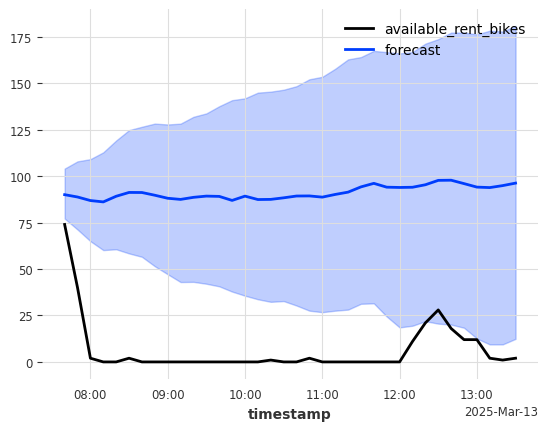

In [24]:
import matplotlib.pyplot as plt

series[-36:].plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [30]:
from darts.utils.timeseries_generation import datetime_attribute_timeseries

model = ARIMA(p=12, d=1, q=2)
# future_cov = datetime_attribute_timeseries(series, "month", cyclic=True, add_length=6)
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

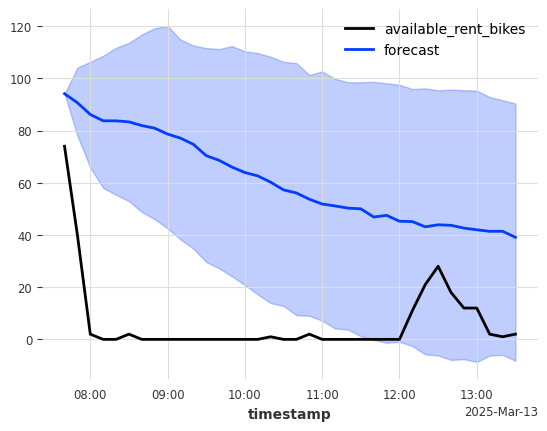

In [ ]:
series[-36:].plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
from sklearn.linear_model import Ridge
plt.legend()

In [39]:
from sklearn.linear_model import Ridge

model = RegressionModel(
    model=Ridge(),
    lags=144
)
model.fit(train)
pred = model.predict(len(val))

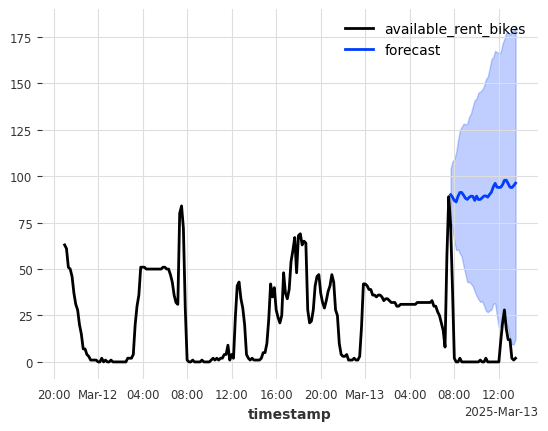

In [41]:
series[-244:].plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
from sklearn.linear_model import Ridge
plt.legend()